**Import libraries**

In [1]:
# fundamental libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Model building libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings

warnings.filterwarnings('ignore')

In [6]:
# Reading the dataset (Student performance in exams)
df = pd.read_csv('../data/raw/StudentsPerformance.csv')

In [7]:
# displaying the head of dataset ( first 5 rows)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
# overall information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# statistic info of numerical columns or features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# Displaying the different content of each categorical features.
for feature in df.select_dtypes(include='object').columns:
    print(f"Categories in {feature} feature : ", end=" ")
    print(df[feature].unique())

Categories in gender feature :  ['female' 'male']
Categories in race/ethnicity feature :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education feature :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch feature :  ['standard' 'free/reduced']
Categories in test preparation course feature :  ['none' 'completed']


In [7]:
# math score will be the dependent variable to be predicted by model, thus it is dropped from datast.
X = df.drop(columns=['math score'], axis=1)

In [8]:
# displaying X , which includes all independent features of dataset.
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [9]:
# storing the dependent variable 'math score' in y variable.
y = df['math score']

In [10]:
# dependent variable y which holds math score values.
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [11]:
# storing the numerical and categorical features separately for preprocessing
numerical_features = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns

In [12]:
numerical_features

Index(['reading score', 'writing score'], dtype='object')

In [13]:
categorical_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# StandardScaler will be applied on numerical features.
scaler = StandardScaler()

# OneHotEncoder will be applied on categorical features to encode them numerically.
ohe = OneHotEncoder()

transformer = ColumnTransformer(
  [
      ('ohe',ohe, categorical_features),
      ('scaler',scaler,numerical_features)
  ]
)

In [15]:
# the preprocessing ( one hot encoding and standard scaler ) is applied on X ( which includes all independent variable both numeric and categorical ). 
X = transformer.fit_transform(X)

In [16]:
# X is now completely in numerical form.
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [17]:
from sklearn.model_selection import train_test_split

# splitting the X, y in to train and test sections
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [18]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [19]:
y_train.shape, y_test.shape

((800,), (200,))

In [20]:
def evaluate(true, predicted):
    """
    This method evaluates each model performance metrics( mae, mse , rmse and r-square)
    
    args:
    true: array of true values
    predicted: array of predicted values of the model.
    
    output:
    mae, rmse and r-square in the form of tuple (mae, rmse, r-square)
    
    """
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r_square = r2_score(true, predicted)
    
    return mae, rmse, r_square
    

In [21]:
# Dictionary of all models to be trained 
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# models_list will store each model name after traiing and testing
models_list =[]

# r2 score each model will be stored in r2_list
r2_list = []

for name, value in models.items():
    model = value 
    model.fit(X_train, y_train) # model training
    
    y_train_pred = model.predict(X_train) # model prediction
    y_test_pred = model.predict(X_test)   # model prediction
    
    train_mae, train_rmse, train_r2_score = evaluate(y_train, y_train_pred) # evaluation of model on training data
    test_mae, test_rmse, test_r2_score = evaluate(y_test, y_test_pred)      # evaluation of model on testing data
    models_list.append(name)
    r2_list.append(test_r2_score)
    
    print(name)
    print('Training Metrics: ')
    print(f' Mean Square Error: {train_mae:.2f}')
    print(f' Root Mean Square Error: {train_rmse:.2f}')
    print(f' R2 Score: {train_r2_score:.2f}')
    
    print("-"*30)
    
    print('Testing Metrics: ')
    print(f' Mean Square Error: {test_mae:.2f}')
    print(f' Root Mean Square Error: {test_rmse:.2f}')
    print(f' R2 Score: {test_r2_score:.2f}')
    
    print("="*30)
    print('\n')

Linear Regression
Training Metrics: 
 Mean Square Error: 4.27
 Root Mean Square Error: 5.33
 R2 Score: 0.87
------------------------------
Testing Metrics: 
 Mean Square Error: 4.22
 Root Mean Square Error: 5.42
 R2 Score: 0.88


Lasso
Training Metrics: 
 Mean Square Error: 5.21
 Root Mean Square Error: 6.59
 R2 Score: 0.81
------------------------------
Testing Metrics: 
 Mean Square Error: 5.16
 Root Mean Square Error: 6.52
 R2 Score: 0.83


Ridge
Training Metrics: 
 Mean Square Error: 4.26
 Root Mean Square Error: 5.32
 R2 Score: 0.87
------------------------------
Testing Metrics: 
 Mean Square Error: 4.21
 Root Mean Square Error: 5.39
 R2 Score: 0.88


KNeighbors Regressor
Training Metrics: 
 Mean Square Error: 4.52
 Root Mean Square Error: 5.71
 R2 Score: 0.86
------------------------------
Testing Metrics: 
 Mean Square Error: 5.62
 Root Mean Square Error: 7.25
 R2 Score: 0.78


Decision Tree
Training Metrics: 
 Mean Square Error: 0.02
 Root Mean Square Error: 0.28
 R2 Score: 1.

In [22]:
# creating a dataframe from models_list and r2_list
report = pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model', 'r2_score']).sort_values(by=['r2_score'], ascending=False)

In [23]:
# It's obvios below that best model is Ridge
report

,Model,r2_score
2,Ridge,0.880593
0,Linear Regression,0.879342
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.851335
5,Random Forest Regressor,0.850916
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighbors Regressor,0.783813
4,Decision Tree,0.737916


**Ridge ( The best model )**

In [24]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
_,_,r_square = evaluate(y_test, y_pred)

print(f'Accuracy : {r_square:.4f}')

Accuracy : 0.8806


<Axes: xlabel='math score'>

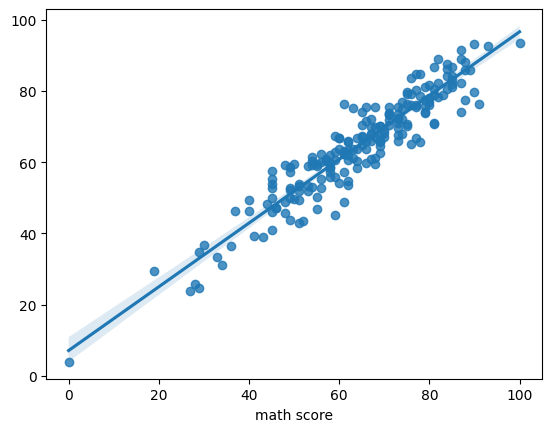

In [27]:
sns.regplot(x=y_test, y=y_pred, robust=True)


In [29]:
# The Ridge model intercept value
ridge.intercept_

65.53167484548763

In [32]:
# coefficient of each feature
ridge.coef_

array([-6.49739745,  6.49739745, -0.79442253, -0.44563794, -1.42302404,
       -1.38710521,  4.05018972, -0.09474545, -0.78471212,  0.8073354 ,
       -1.45580342,  0.89684445,  0.63108115, -1.76513861,  1.76513861,
       -1.61630603,  1.61630603,  3.59967894, 10.80955319])